In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("housing.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   ZN       509 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     509 non-null    int64  
 4   NOX      507 non-null    float64
 5   RM       509 non-null    float64
 6   AGE      508 non-null    float64
 7   DIS      509 non-null    float64
 8   RAD      508 non-null    float64
 9   TAX      509 non-null    int64  
 10  PTRATIO  509 non-null    float64
 11  B        509 non-null    float64
 12  LSTAT    508 non-null    float64
 13  MEDV     509 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.8 KB


In [4]:
df.isnull().sum()


CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

In [5]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [6]:
df = pd.get_dummies(df, drop_first=True)


In [9]:
df.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [10]:
y = df["MEDV"]         
X = df.drop("MEDV", axis=1)   

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_pred = model.predict(X_test)


In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 3.0019743940017367
RMSE: 4.521782724487045
R² Score: 0.7383383272224424


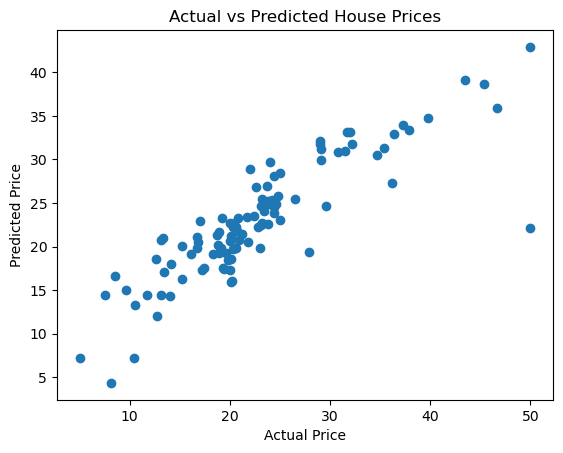

In [15]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


# Insights & Observations

- House price increases with size and number of rooms.
- Location significantly impacts pricing.
- Linear regression performs reasonably well for price prediction.
- Some deviation exists due to non-linear factors.
